# - ***Marketing Analysis Using `RFM (Recency, Frequency and Monetary)` Framework***
#### `RFM Analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns`

In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("New Retail.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,UnitPrice,Year,Month,Day,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,1.73,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1.78,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1.78,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,22.86,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,19.20,2009,12,1,7


- I assume that the analysis is done after the a week from the campaign.

In [35]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
max_date = df["InvoiceDate"].max() 

# Add 7 days to the maximum date
today_date = max_date + pd.DateOffset(days=7)
print(f"today's date is {max_date}\nthe day the analysis is done date is {today_date}")

today's date is 2010-12-09 20:01:00
the day the analysis is done date is 2010-12-16 20:01:00


In [36]:
rfm = df.groupby("Customer ID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days,
                                    "Invoice": lambda num: num.nunique(),
                                    "Price": lambda price: price.sum()                       
                                    })
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346,171,11,206.36
12347,9,2,162.95
12348,80,1,14.39
12349,49,2,373.44
12351,17,1,49.46
...,...,...,...
18283,24,6,477.27
18284,73,1,41.09
18285,302,1,47.65


In [37]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4211.0,97.036333,96.592957,7.00,24.000,58.00,143.00,380.00
Frequency,4211.0,4.303491,7.467080,1.00,1.000,2.00,5.00,184.00
Monetary,4211.0,264.893972,577.427689,0.29,53.285,125.44,291.78,18264.79


- Now I will define the RFM Scores. This score defines how bad or how good this customer is interacting with our store 
    - - Recency represents How far was this customer's last purchase.
    - - Frequency represents How often this customer purchases.
    - - Monetary represents How much thi customer spent on our store.

In [38]:
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequeny_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm

,Recency,Frequency,Monetary,recency_score,frequeny_score,monetary_score
Customer ID,,,,,,
12346,171,11,206.36,2,5,4
12347,9,2,162.95,5,2,3
12348,80,1,14.39,2,1,1
12349,49,2,373.44,3,2,5
12351,17,1,49.46,5,1,2
...,...,...,...,...,...,...
18283,24,6,477.27,4,5,5
18284,73,1,41.09,3,2,1
18285,302,1,47.65,1,2,2


- The Score can be defined by the three factors all combined or two of them. for our case Money may be misleading if someone buys an Expensive product for only one time this will give him high score for  Monetary but he is actually not a good customer as he bought only one time and maybe he bought a long time ago  

In [39]:
rfm["RFM_SCORE"] = rfm['recency_score'].astype(str) + rfm['frequeny_score'].astype(str)
rfm.sample(10)

,Recency,Frequency,Monetary,recency_score,frequeny_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
18156,11,1,144.64,5,2,3,52
15347,8,4,102.80,5,4,3,54
13254,18,1,10.09,5,1,1,51
15051,21,6,283.35,5,5,4,55
12409,62,4,310.07,3,4,4,34
14382,32,1,304.14,4,1,4,41
13861,71,2,58.19,3,2,2,32
17993,259,1,139.89,1,2,3,12
16064,367,1,45.96,1,2,2,12


In [40]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': "Can't Loose",
    r'3[1-2]': "About to Sleep",
    r'33': "Need Attention",
    r'[3-4][4-5]': "Loyal Customer",
    r'41': "Promising",
    r'51': "New Customer",
    r'[4-5][2-3]': "Potintial Loyalist",
    r'5[4-5]': "VIP"
}

rfm["Segments"] = rfm["RFM_SCORE"].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequeny_score,monetary_score,RFM_SCORE,Segments
Customer ID,,,,,,,,
12346,171,11,206.36,2,5,4,25,Can't Loose
12347,9,2,162.95,5,2,3,52,Potintial Loyalist
12348,80,1,14.39,2,1,1,21,Hibernating
12349,49,2,373.44,3,2,5,32,About to Sleep
12351,17,1,49.46,5,1,2,51,New Customer


- ***What is the percentage of each Segment in our dataset?***

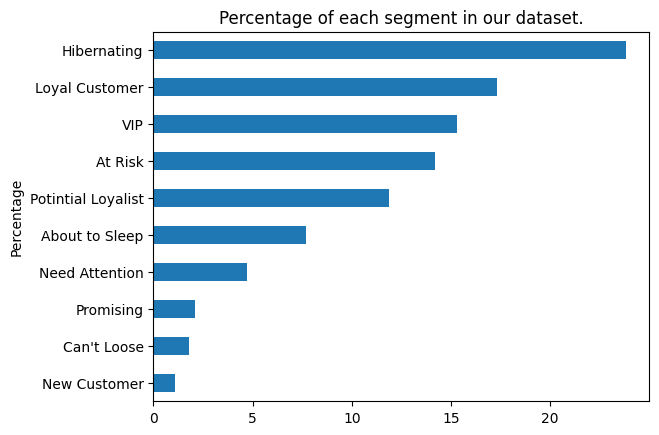

In [41]:
(rfm["Segments"].value_counts(normalize=True).round(3) * 100).plot(kind='barh')
plt.xlabel("")
plt.ylabel("Percentage")
plt.title("Percentage of each segment in our dataset.")

plt.gca().invert_yaxis()  # Invert the y-axis to show the highest on the top

plt.savefig("figs/What is the Percentage of each segment in our dataset.png", format="png")
plt.show()

In [42]:
rfm.to_csv("rfm marketing framework.csv", index=False)